# Test Maze - 1
Is there any consistency? The in class lab was full of conflicting results for the students...

In [42]:
import shutil
import glob
import os

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import explorationlib
from explorationlib import agent
from explorationlib import local_gym as gym

from explorationlib.run import experiment
from explorationlib.util import select_exp
from explorationlib.util import load
from explorationlib.util import save

from explorationlib.plot import plot_position2d
from explorationlib.plot import plot_length_hist
from explorationlib.plot import plot_length
from explorationlib.plot import plot_angle
from explorationlib.plot import plot_targets2d
from explorationlib.plot import show_gif

from explorationlib import score
from explorationlib.score import search_efficiency
from explorationlib.score import first_reward
from explorationlib.score import average_reward
from explorationlib.score import total_reward

In [40]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# One maze for all

In [22]:
# Experiment settings
# For all keep the maze the saame
num_experiments = 1000

num_steps = 6400
min_length = 1
max_length = 10

# Env
boundary = (8, 8)
env = gym.ScentMazeEnv(maze_size=boundary)
coord, scent = gym.create_maze_scent(boundary, amplitude=1, sigma=1)
env.add_scent(scent)

# p_neg=1, p_pos=0.0

In [23]:

# Agents
diff = agent.DiffusionDiscrete(num_actions=4, min_length=min_length, scale=1)
levy2 = agent.TruncatedLevyDiscrete(num_actions=4, min_length=min_length, max_length=max_length, exponent=2)
sniff = agent.GradientDiffusionDiscrete(num_actions=4, min_length=min_length, scale=1.0, p_neg=1, p_pos=0.0)

# Cleanup 
for path in glob.glob("data/test4_*.pkl"):
    os.remove(path)

# !
levy2_exp = experiment(
    f"data/test_maze_levy.pkl",
    levy2,
    env,
    num_steps=num_steps,
    num_experiments=num_experiments,
    dump=False,
    split_state=True,
)
diff_exp = experiment(
    f"data/test_maze_diff.pkl",
    diff,
    env,
    num_steps=num_steps,
    num_experiments=num_experiments,
    dump=False,
    split_state=True,
)
sniff_exp = experiment(
    f"data/test_maze_sniff.pkl",
    sniff,
    env,
    num_steps=num_steps,
    num_experiments=num_experiments,
    dump=False,
    split_state=True,
)

test_maze_sniff: 100%|██████████| 1000/1000 [02:16<00:00,  7.33it/s]


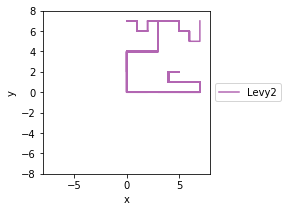

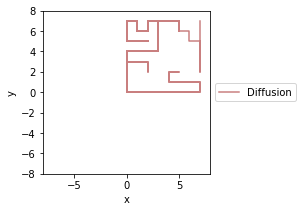

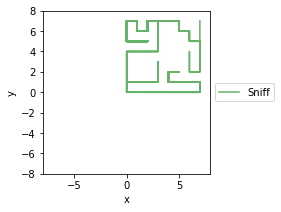

In [24]:
plot_boundary = boundary

num_experiment = 32
ax = plot_position2d(
    select_exp(levy2_exp, num_experiment),
    boundary=plot_boundary,
    label="Levy2",
    color="purple",
    alpha=0.6,
)
ax = plot_position2d(
    select_exp(diff_exp, num_experiment),
    boundary=plot_boundary,
    label="Diffusion",
    color="brown",
    alpha=0.6,
    # ax=ax,
)
ax = plot_position2d(
    select_exp(sniff_exp, num_experiment),
    boundary=plot_boundary,
    label="Sniff",
    color="green",
    alpha=0.6,
    # ax=ax,
)

total_reward: 100%|██████████| 1000/1000 [00:00<00:00, 3650.49it/s]


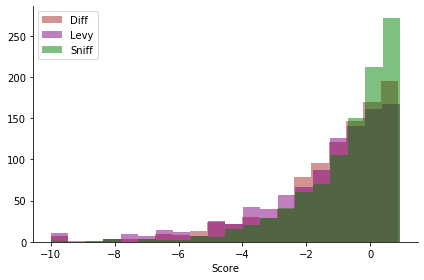

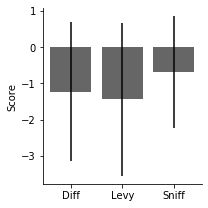

In [25]:
# Results
results = [diff_exp, levy2_exp, sniff_exp]
names = ["Diff", "Levy", "Sniff"]
colors = ["brown", "purple", "green"]

# Score by eff
scores = []
for name, res, color in zip(names, results, colors):
    r = total_reward(res)
    scores.append(r)   

# Dists
for (name, s, c) in zip(names, scores, colors):
    plt.hist(s, label=name, color=c, alpha=0.5, bins=20)
    plt.legend()
    plt.xlabel("Score")
    plt.tight_layout()
    sns.despine()

# Tabulate
m, sd = [], []
for (name, s, c) in zip(names, scores, colors):
    m.append(np.mean(s))
    sd.append(np.std(s))

# Plot means
fig = plt.figure(figsize=(3, 3))
plt.bar(names, m, yerr=sd, color="black", alpha=0.6)
plt.ylabel("Score")
plt.tight_layout()
sns.despine()

# p_neg=1, p_pos=0.25

In [26]:
# Agents
diff = agent.DiffusionDiscrete(num_actions=4, min_length=min_length, scale=1)
levy2 = agent.TruncatedLevyDiscrete(num_actions=4, min_length=min_length, max_length=max_length, exponent=2)
sniff = agent.GradientDiffusionDiscrete(num_actions=4, min_length=min_length, scale=1.0, p_neg=1, p_pos=0.25)

# Cleanup 
for path in glob.glob("data/test4_*.pkl"):
    os.remove(path)

# !
levy2_exp = experiment(
    f"data/test_maze_levy.pkl",
    levy2,
    env,
    num_steps=num_steps,
    num_experiments=num_experiments,
    dump=False,
    split_state=True,
)
diff_exp = experiment(
    f"data/test_maze_diff.pkl",
    diff,
    env,
    num_steps=num_steps,
    num_experiments=num_experiments,
    dump=False,
    split_state=True,
)
sniff_exp = experiment(
    f"data/test_maze_sniff.pkl",
    sniff,
    env,
    num_steps=num_steps,
    num_experiments=num_experiments,
    dump=False,
    split_state=True,
)

test_maze_sniff: 100%|██████████| 1000/1000 [02:09<00:00,  7.70it/s]


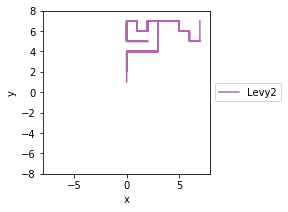

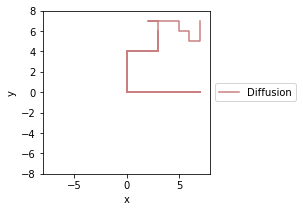

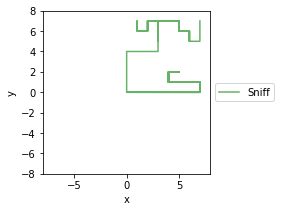

In [27]:
plot_boundary = boundary

num_experiment = 13
ax = plot_position2d(
    select_exp(levy2_exp, num_experiment),
    boundary=plot_boundary,
    label="Levy2",
    color="purple",
    alpha=0.6,
)
ax = plot_position2d(
    select_exp(diff_exp, num_experiment),
    boundary=plot_boundary,
    label="Diffusion",
    color="brown",
    alpha=0.6,
    # ax=ax,
)
ax = plot_position2d(
    select_exp(sniff_exp, num_experiment),
    boundary=plot_boundary,
    label="Sniff",
    color="green",
    alpha=0.6,
    # ax=ax,
)

total_reward: 100%|██████████| 1000/1000 [00:00<00:00, 7545.35it/s]


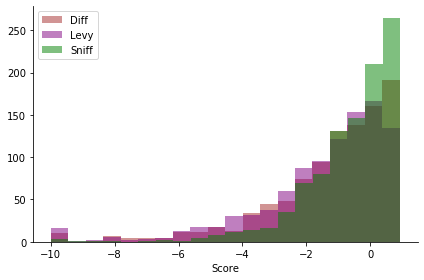

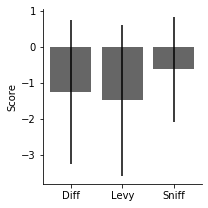

In [28]:
# Results
results = [diff_exp, levy2_exp, sniff_exp]
names = ["Diff", "Levy", "Sniff"]
colors = ["brown", "purple", "green"]

# Score by eff
scores = []
for name, res, color in zip(names, results, colors):
    r = total_reward(res)
    scores.append(r)   

# Dists
for (name, s, c) in zip(names, scores, colors):
    plt.hist(s, label=name, color=c, alpha=0.5, bins=20)
    plt.legend()
    plt.xlabel("Score")
    plt.tight_layout()
    sns.despine()

# Tabulate
m, sd = [], []
for (name, s, c) in zip(names, scores, colors):
    m.append(np.mean(s))
    sd.append(np.std(s))

# Plot means
fig = plt.figure(figsize=(3, 3))
plt.bar(names, m, yerr=sd, color="black", alpha=0.6)
plt.ylabel("Score")
plt.tight_layout()
sns.despine()

# p_neg=0.75, p_pos=0.25

In [29]:
# Agents
diff = agent.DiffusionDiscrete(num_actions=4, min_length=min_length, scale=1)
levy2 = agent.TruncatedLevyDiscrete(num_actions=4, min_length=min_length, max_length=max_length, exponent=2)
sniff = agent.GradientDiffusionDiscrete(num_actions=4, min_length=min_length, scale=1.0, p_neg=0.75, p_pos=0.25)

# Cleanup 
for path in glob.glob("data/test4_*.pkl"):
    os.remove(path)

# !
levy2_exp = experiment(
    f"data/test_maze_levy.pkl",
    levy2,
    env,
    num_steps=num_steps,
    num_experiments=num_experiments,
    dump=False,
    split_state=True,
)
diff_exp = experiment(
    f"data/test_maze_diff.pkl",
    diff,
    env,
    num_steps=num_steps,
    num_experiments=num_experiments,
    dump=False,
    split_state=True,
)
sniff_exp = experiment(
    f"data/test_maze_sniff.pkl",
    sniff,
    env,
    num_steps=num_steps,
    num_experiments=num_experiments,
    dump=False,
    split_state=True,
)

test_maze_sniff: 100%|██████████| 1000/1000 [02:14<00:00,  7.44it/s]


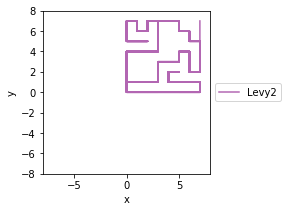

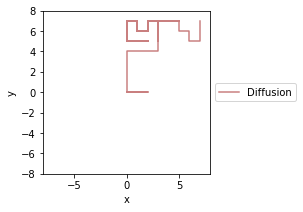

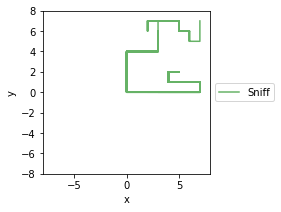

In [30]:
plot_boundary = boundary

num_experiment = 13
ax = plot_position2d(
    select_exp(levy2_exp, num_experiment),
    boundary=plot_boundary,
    label="Levy2",
    color="purple",
    alpha=0.6,
)
ax = plot_position2d(
    select_exp(diff_exp, num_experiment),
    boundary=plot_boundary,
    label="Diffusion",
    color="brown",
    alpha=0.6,
    # ax=ax,
)
ax = plot_position2d(
    select_exp(sniff_exp, num_experiment),
    boundary=plot_boundary,
    label="Sniff",
    color="green",
    alpha=0.6,
    # ax=ax,
)

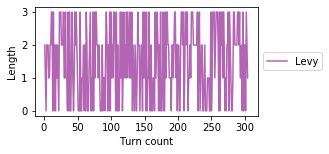

In [44]:
ax = None
ax = plot_angle(
    select_exp(levy2_exp, 0),
    label="Levy",
    color="purple",
    alpha=0.6,
    ax=ax,
)

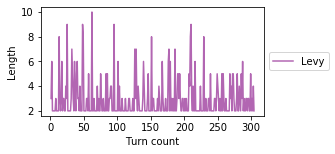

In [45]:
ax = None
ax = plot_length(
    select_exp(levy2_exp, 0),
    label="Levy",
    color="purple",
    alpha=0.6,
    ax=ax,
)

total_reward: 100%|██████████| 1000/1000 [00:00<00:00, 7121.39it/s]


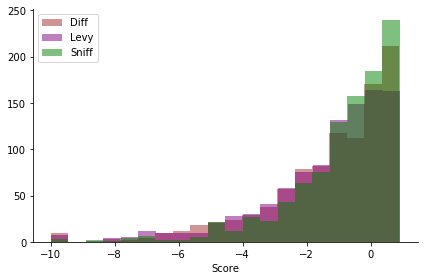

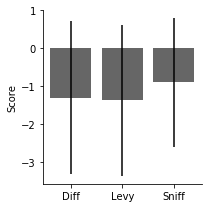

In [31]:
# Results
results = [diff_exp, levy2_exp, sniff_exp]
names = ["Diff", "Levy", "Sniff"]
colors = ["brown", "purple", "green"]

# Score by eff
scores = []
for name, res, color in zip(names, results, colors):
    r = total_reward(res)
    scores.append(r)   

# Dists
for (name, s, c) in zip(names, scores, colors):
    plt.hist(s, label=name, color=c, alpha=0.5, bins=20)
    plt.legend()
    plt.xlabel("Score")
    plt.tight_layout()
    sns.despine()

# Tabulate
m, sd = [], []
for (name, s, c) in zip(names, scores, colors):
    m.append(np.mean(s))
    sd.append(np.std(s))

# Plot means
fig = plt.figure(figsize=(3, 3))
plt.bar(names, m, yerr=sd, color="black", alpha=0.6)
plt.ylabel("Score")
plt.tight_layout()
sns.despine()